In [1]:
from math import e, factorial,log, gamma, sqrt, floor
from matplotlib import pyplot as pt
from numpy.random import geometric,exponential,poisson
from scipy.stats import ks_2samp
from scipy.stats import norm
from numpy import linspace
from IPython.display import Markdown
from analysis import *

In [2]:
def genWindowHistogram(r1,r2,wnd,trx):
    windows = []
    for i in range(0,len(r1),wnd):
        count = 0
        for j in range(i,i+wnd):
            try:
                if r1[j]=='S' and r2[j]=='B':
                    count += 1
            except:
                pass
        windows.append(count)
     
    result = [0 for i in range(wnd)]
    for n in range(len(result)):
        result[n] = windows.count(n)/len(windows)
    
    return result

Ttx = 23
Trx = 60
Tn = 100
    
pt.rcParams["figure.figsize"] = (20,10)

## Networking disabled

Success probability evts: 0.090006
-----------------------------------------------------------
PB2= 0.900093
PS1= 0.099882
PB*PS= 0.089903
rt1 = 15.001552 B/s
Psuc= 0.833333
-----------------------------------------------------------
Success probability evts: 0.159598
-----------------------------------------------------------
PB2= 0.800441
PS1= 0.199443
PB*PS= 0.159643
rt1 = 13.340679 B/s
Psuc= 0.974567
-----------------------------------------------------------
Success probability evts: 0.209987
-----------------------------------------------------------
PB2= 0.699872
PS1= 0.300476
PB*PS= 0.210295
rt1 = 11.664534 B/s
Psuc= 0.995608
-----------------------------------------------------------
Success probability evts: 0.239965
-----------------------------------------------------------
PB2= 0.600763
PS1= 0.399105
PB*PS= 0.239768
rt1 = 10.012724 B/s
Psuc= 0.998853
-----------------------------------------------------------
Success probability evts: 0.249930
-----------------------------

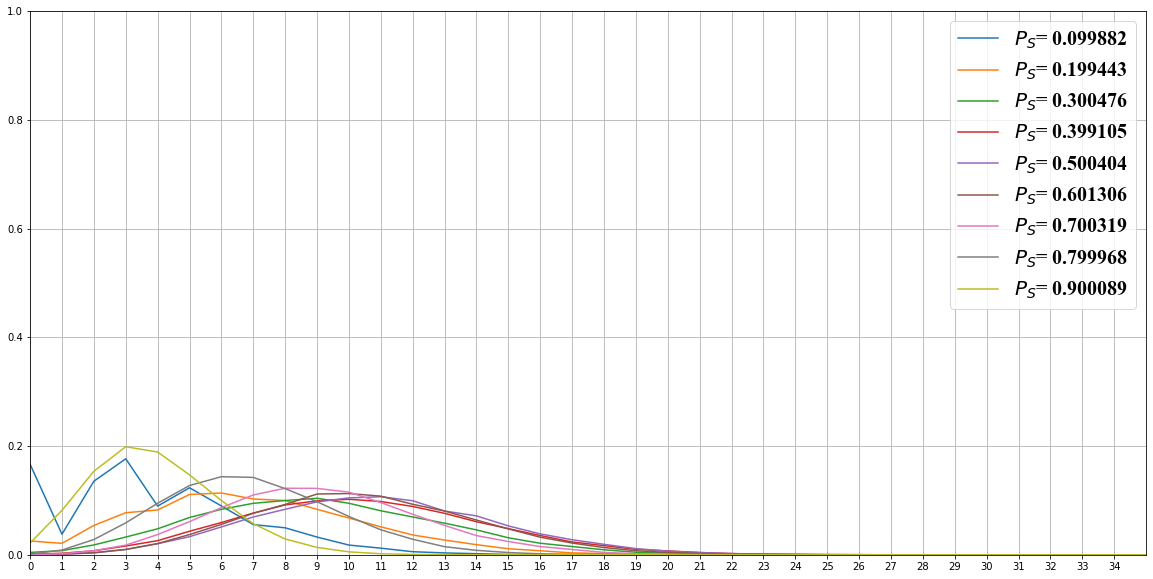

In [3]:
for i in range(1,10):
    f1 = open("r%d-d0-result.txt"%i)
    raw1 = f1.read()
    f1.close()

    f2 = open("r%d-d1-result.txt"%i)
    raw2 = f2.read()
    f2.close()
    
    Eb1,Es1,En1 = computeEvents(raw1,Ttx,Trx,Tn)
    Eb2,Es2,En2 = computeEvents(raw2,Ttx,Trx,Tn)
    
    wnds1 = genWindowHistogram(raw1,raw2,1000,Trx)
    Ps = checkSuccess(raw2,raw1)*Ttx/(Eb1*Ttx+En1*Tn+Es1*Trx)
    print("Success probability evts: %.6f"%(Ps))
    print('-----------------------------------------------------------')
    Ps1 = Es1*Trx/(Eb1*Ttx+En1*Tn+Es1*Trx)
    Pb2 = Eb2*Ttx/(Eb1*Ttx+En1*Tn+Es1*Trx)
    rt1 = Pb2/(Trx/1000)
    
    print("PB2= %.6f"%(Pb2))
    print("PS1= %.6f"%(Ps1))
    print("PB*PS= %.6f"%(Pb2*Ps1))
    print("rt1 = %.6f B/s"%(rt1))
    print("Psuc= %.6f"%sum(wnds1[1:]))
    print('-----------------------------------------------------------')
    
    pt.plot(range(len(wnds1)),wnds1,label=r"$P_{S}$= %.6f"%(Trx*Es1/len(raw1)))


pt.legend(prop={'family':'Times New Roman', 'size':20})
pt.axis([0,35,0,1.0])
pt.xticks(range(0,35,1), [str(n) for n in range(0,35,1)])
pt.grid(True)
pt.savefig('success_distribution_BS.pdf',dpi=300, bbox_inches='tight')
pt.show()

## Networking enabled

Success probability evts: 93123.000000
-----------------------------------------------------------
PB2= 0.928417
PS1= 0.044594
PB*PS= 0.041402
-----------------------------------------------------------
Success probability evts: 174910.000000
-----------------------------------------------------------
PB2= 0.875236
PS1= 0.095776
PB*PS= 0.083827
-----------------------------------------------------------
Success probability evts: 241979.000000
-----------------------------------------------------------
PB2= 0.813018
PS1= 0.154858
PB*PS= 0.125902
-----------------------------------------------------------
Success probability evts: 294675.000000
-----------------------------------------------------------
PB2= 0.739194
PS1= 0.225602
PB*PS= 0.166764
-----------------------------------------------------------
Success probability evts: 314464.000000
-----------------------------------------------------------
PB2= 0.697745
PS1= 0.267138
PB*PS= 0.186394
-----------------------------------------

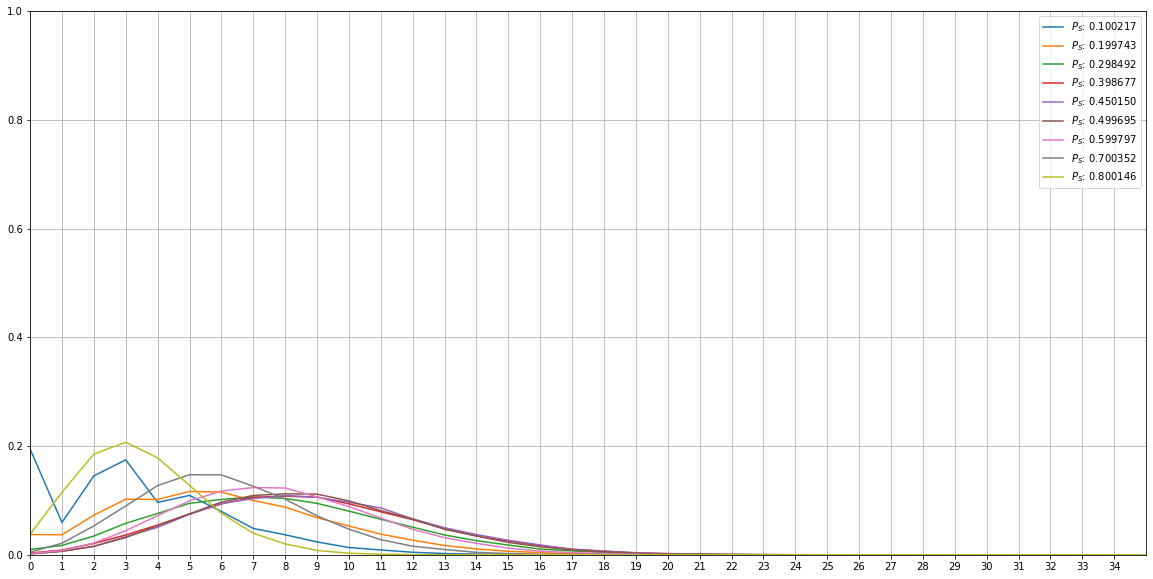

In [4]:
for i in range(1,10):
    
    f3 = open("r2%d-d0-result.txt"%i)
    raw3 = f3.read()
    f3.close()

    f4 = open("r2%d-d1-result.txt"%i)
    raw4 = f4.read()
    f4.close()
    
    Eb3,Es3,En3 = computeEvents(raw3,Ttx,Trx,Tn)
    Eb4,Es4,En4 = computeEvents(raw4,Ttx,Trx,Tn)
    wnds2 = genWindowHistogram(raw3,raw4,1000,Trx)
    print("Success probability evts: %.6f"%(checkSuccess(raw4,raw3)))
    print('-----------------------------------------------------------')
    rt4 = (Eb4/(Eb4+Es4+En4))/(Trx/1000)
    Ps1 = Es3/(Eb3+En3+Es3)
    Pb2 = Eb4/(Eb4+En4+Es4)
    print("PB2= %.6f"%(Pb2))
    print("PS1= %.6f"%(Ps1))
    print("PB*PS= %.6f"%(Pb2*Ps1))
    print('-----------------------------------------------------------')
    pt.plot(range(len(wnds2)),wnds2,label=r"$P_{S}$: %.6f"%(Trx*Es3/len(raw3)))

    
pt.legend()
pt.axis([0,35,0,1.0])
pt.xticks(range(0,35,1), [str(n) for n in range(0,35,1)])
pt.grid(True)
pt.savefig('success_distribution_BSN.pdf',dpi=300, bbox_inches='tight')
pt.show()